### Hito3 para Rendimiento Escolar
*"Modelación descriptiva, que busca definir cuáles son los principales determinantes del objeto de estudio. En base a esta sección se podrá construir o depurar el modelo predictivo."*

####  Carga de librerias e importación de .csv obtenido en el hito anterior

In [165]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula as sm
import statsmodels.formula.api as smf

#from graficos import *
import funciones as fun
import graficos as gr
from calidad_datos2 import calidad_datos as cal

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (8,6) # Tamaño gráficos (5, 3)
plt.rcParams["figure.dpi"] = 75 # resolución gráficos 100

In [166]:
#Se realiza la importación de los datos y revision
df = pd.read_csv('students_ready.csv')
print(df.shape)
cal(df)

(395, 33)


,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
G3,float64,3,0.007595,37,0.093671,392.0,NaN,NaN,NaN,10.446429,4.568007,0.0,8.0,11.0,14.0,20.0,6.0,-1.0,23.0,0
G2,float64,0,0.000000,13,0.032911,395.0,NaN,NaN,NaN,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0,4.0,3.0,19.0,13
failures,float64,5,0.012658,308,0.779747,390.0,NaN,NaN,NaN,0.335897,0.746883,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,82
studytime,float64,5,0.012658,0,0.000000,390.0,NaN,NaN,NaN,2.038462,0.84297,1.0,1.0,2.0,2.0,4.0,1.0,-0.5,3.5,27
traveltime,float64,3,0.007595,0,0.000000,392.0,NaN,NaN,NaN,1.451531,0.699066,1.0,1.0,1.0,2.0,4.0,1.0,-0.5,3.5,8
famrel,float64,5,0.012658,0,0.000000,390.0,NaN,NaN,NaN,3.948718,0.896973,1.0,4.0,4.0,5.0,5.0,1.0,2.5,6.5,26
freetime,float64,2,0.005063,0,0.000000,393.0,NaN,NaN,NaN,3.229008,0.996664,1.0,3.0,3.0,4.0,5.0,1.0,1.5,5.5,19
Dalc,float64,3,0.007595,0,0.000000,392.0,NaN,NaN,NaN,1.482143,0.893104,1.0,1.0,1.0,2.0,5.0,1.0,-0.5,3.5,18
goout,float64,5,0.012658,0,0.000000,390.0,NaN,NaN,NaN,3.102564,1.117629,1.0,2.0,3.0,4.0,5.0,2.0,-1.0,7.0,0
Medu,float64,3,0.007595,3,0.007595,392.0,NaN,NaN,NaN,2.742347,1.095185,0.0,2.0,3.0,4.0,4.0,2.0,-1.0,7.0,0


###  Modelación descriptiva

- Eliminación de nulos.
- Transformacion de variables a binarias (minoritarias = 1)
- Se resetea el indice del dataframe
- Binary Encoding (dummies).

In [167]:
# Eliminación de nulos
df = df.dropna()

# Reemplazo de yes/no - binarizacion
print('Variables binarizadas:')
for i in df:
    if len(df[i].value_counts().dropna()) == 2:
        lista = list(df[i].unique())
        print(i)
        # Se aplica criterio de mayor valor de datos = 0 / minoritarias = 1
        if df[i].value_counts()[lista[0]] > df[i].value_counts()[lista[1]]:
            df = df.replace(lista,[0,1])
        else:
            df = df.replace(lista,[1,0])
cal(df) #Las binarizadas quedan como int64                   

Variables binarizadas:
school
sex
address
famsize
Pstatus
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
school,int64,0,0.0,247,0.869718,284.0,NaN,NaN,NaN,0.130282,0.337207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37
romantic,int64,0,0.0,189,0.665493,284.0,NaN,NaN,NaN,0.334507,0.472651,0.0,0.0,0.0,1.0,1.0,1.0,-1.5,2.5,0
internet,int64,0,0.0,53,0.186620,284.0,NaN,NaN,NaN,0.81338,0.390294,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,53
higher,int64,0,0.0,15,0.052817,284.0,NaN,NaN,NaN,0.947183,0.224063,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,15
nursery,int64,0,0.0,61,0.214789,284.0,NaN,NaN,NaN,0.785211,0.411401,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,61
activities,int64,0,0.0,136,0.478873,284.0,NaN,NaN,NaN,0.521127,0.500435,0.0,0.0,1.0,1.0,1.0,1.0,-1.5,2.5,0
paid,int64,0,0.0,158,0.556338,284.0,NaN,NaN,NaN,0.443662,0.497693,0.0,0.0,0.0,1.0,1.0,1.0,-1.5,2.5,0
schoolsup,int64,0,0.0,246,0.866197,284.0,NaN,NaN,NaN,0.133803,0.341041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,38
famsup,int64,0,0.0,110,0.387324,284.0,NaN,NaN,NaN,0.612676,0.487999,0.0,0.0,1.0,1.0,1.0,1.0,-1.5,2.5,0
address,int64,0,0.0,214,0.753521,284.0,NaN,NaN,NaN,0.246479,0.431721,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,70


In [168]:
# Dummies
df_dummies = pd.get_dummies(df, drop_first=True).reset_index(drop=True)
df_dummies.columns = [col.replace('-', '_') for col in df_dummies.columns]
df_dummies.columns = df_dummies.columns.str.replace('.0', '')

df_dummies.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,17.0,0,0,0,1.0,1.0,1.0,2.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,15.0,0,0,0,4.0,2.0,1.0,3.0,...,0,0,0,1,0,1,0,0,1,0
2,0,1,16.0,0,1,0,4.0,3.0,1.0,2.0,...,0,0,1,0,0,0,0,1,1,0
3,0,1,16.0,0,1,0,2.0,2.0,1.0,2.0,...,0,0,1,0,0,1,0,0,1,0
4,0,0,17.0,0,0,1,4.0,4.0,2.0,2.0,...,0,0,0,0,1,1,0,0,1,0


Estimación de los modelos de las VO G1-G2-G3:
- Con el dataframe preparado y por medio del uso de OLS, se estiman descriptivamente los promedios semestrales (G1, G2, G3) (OLS = mínimos cuadrados ordinarios)
- Se genera la formula para cada VO
- Se prueban modelos para cada VO

In [169]:
# Se eliminan las VO de acuerdo al promedio a calcular.
df_dummies_g1 = df_dummies.drop(['G2', 'G3'], axis=1) # solo queda G1
df_dummies_g2 = df_dummies.drop(['G1', 'G3'], axis=1) # solo queda G2
df_dummies_g3 = df_dummies.drop(['G1', 'G2'], axis=1) # solo queda G3

#Construcion de la formula OLS
base_g1_1 = fun.mf(df_dummies_g1, var_obj='G1')
base_g2_1 = fun.mf(df_dummies_g2, var_obj='G2')
base_g3_1 = fun.mf(df_dummies_g3, var_obj='G3')


#### Modelo 1 (G1)

OLS para G1

In [170]:
# Creación del modelo
model_g1_1 = smf.ols(base_g1_1, data=df_dummies_g1).fit()
model_g1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.090
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           5.75e-08
Time:                        17:45:20   Log-Likelihood:                -683.63
No. Observations:                 284   AIC:                             1447.
Df Residuals:                     244   BIC:                             1593.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.9820      3.626      2.753      0.006       2.839      17.125
school               -0.3886      0.666     -0.583      0.560      -1.701       0.924
sex                   0.7631      0.432      1.768      0.078      -0.087       1.613
age                   0.0772      0.185      0.418      0.677      -0.287       0.441
address              -0.0205      0.487     -0.042      0.966      -0.980       0.939
famsize               0.3125      0.440      0.710      0.478      -0.555       1.180
Pstatus               0.1872      0.650      0.288      0.774      -1.094       1.468
Medu                  0.1809      0.282      0.642      0.521      -0.374       0.736
Fedu                  0.1527      0.236      0.646      0.519      -0.313       0.618
traveltime           -0.0215      0.291     -0.074      0.941      -0.594       0.551
studytime             0.5074      0.245      2.068      0.040       0.024       0.991
failures             -1.1235      0.282     -3.977      0.000      -1.680      -0.567
schoolsup            -1.7737      0.564     -3.145      0.002      -2.885      -0.663
famsup               -1.0062      0.411     -2.447      0.015      -1.816      -0.196
paid                  0.0321      0.403      0.080      0.937      -0.762       0.826
activities           -0.4719      0.370     -1.276      0.203      -1.201       0.257
nursery              -0.0255      0.455     -0.056      0.955      -0.922       0.871
higher                1.1077      0.876      1.265      0.207      -0.617       2.833
internet              0.0671      0.502      0.134      0.894      -0.921       1.055
romantic             -0.0842      0.399     -0.211      0.833      -0.870       0.702
famrel                0.1449      0.213      0.681      0.497      -0.274       0.564
freetime              0.3778      0.193      1.959      0.051      -0.002       0.758
goout                -0.7691      0.199     -3.873      0.000      -1.160      -0.378
Dalc                 -0.0730      0.286     -0.255      0.799      -0.636       0.490
Walc                  0.1585      0.210      0.756      0.451      -0.255       0.572
health               -0.2918      0.142     -2.062      0.040      -0.571      -0.013
absences             -0.0048      0.024     -0.196      0.845      -0.053       0.043
Mjob_health           1.0251      0.918      1.116      0.265      -0.784       2.834
Mjob_other           -0.5423      0.598     -0.907      0.365      -1.720       0.636
Mjob_services         0.3913      0.676      0.579      0.563      -0.939       1.722
Mjob_teacher         -1.0850      0.836     -1.298      0.195      -2.731       0.561
Fjob_health          -1.0572      1.304     -0.810      0.418      -3.626       1.512
Fjob_other           -1.4765      0.984     -1.500      0.135      -3.415

Gracias al 95% de confianza ("p" del estadístico F < 0.05) nuestro modelo es significativo. Con las variables incorporadas explicamos un 33% a G1. 

Eliminaremos variables que no son significativas, es decir, aquellas que contienen el cero en su intervalo de confianza.

#### Modelo 2 (G1)

In [171]:
# Creacion de DF con valores significativos
clear_var_sig = ['studytime', 'failures', 'schoolsup', 'famsup', 'goout','health', 'G1']
df_mod_g1 = df_dummies_g1.loc[:, clear_var_sig]
df_mod_g1

,studytime,failures,schoolsup,famsup,goout,health,G1
0,2.0,0.0,0,1,3.0,3.0,5.0
1,3.0,0.0,0,1,2.0,5.0,15.0
2,2.0,0.0,0,1,2.0,5.0,15.0
3,2.0,0.0,0,0,4.0,3.0,12.0
4,2.0,0.0,1,1,4.0,1.0,6.0
...,...,...,...,...,...,...,...
279,2.0,2.0,0,1,4.0,4.0,9.0
280,1.0,0.0,0,0,5.0,2.0,14.0
281,1.0,3.0,0,0,3.0,3.0,10.0
282,1.0,0.0,0,0,1.0,5.0,11.0


In [172]:
# Creación del modelo
base_formula_g1_2 = fun.mf(df_mod_g1, var_obj='G1')
model_g1_2 = smf.ols(base_formula_g1_2, data=df_mod_g1).fit()
model_g1_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     12.14
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           4.03e-12
Time:                        17:45:20   Log-Likelihood:                -707.46
No. Observations:                 284   AIC:                             1429.
Df Residuals:                     277   BIC:                             1454.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9565      0.899     15.524      0.000      12.187      15.726
studytime      0.3173      0.216      1.470      0.143      -0.108       0.742
failures      -1.2548      0.247     -5.071      0.000      -1.742      -0.768
schoolsup     -1.9779      0.522     -3.790      0.000      -3.005      -0.951
famsup        -0.6480      0.370     -1.750      0.081      -1.377       0.081
goout         -0.5645      0.166     -3.397      0.001      -0.892      -0.237
health        -0.2346      0.135     -1.743      0.083      -0.500       0.030
==============================================================================
Omnibus:                       10.103   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.025
Skew:                           0.182   Prob(JB):                       0.0492
Kurtosis:                       2.387   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- El nuevo modelo mantiene un 95% de confianza, pero disminuye la explicacion de los atributos sobre la variable explicada (20,8%).
- Lo indicado es esperable ya que se eliminaron las variables que no demostraron significancia en el primer modelo. (Que pasan por cero)

Graficos variables significativas:

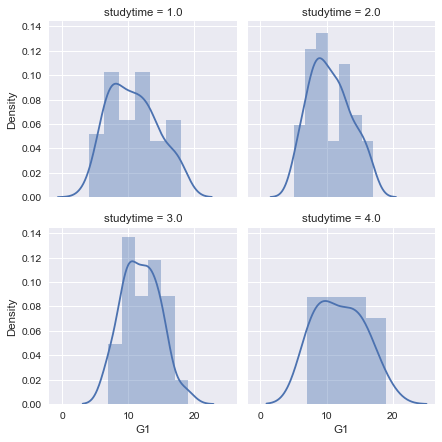

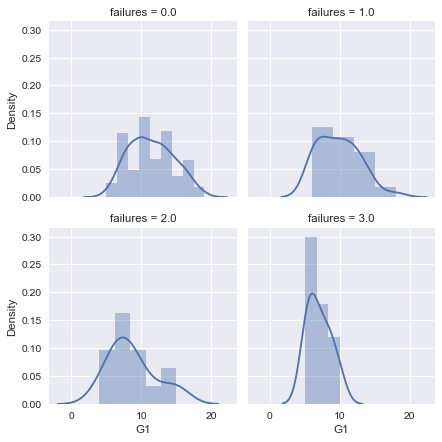

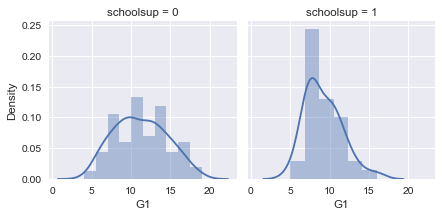

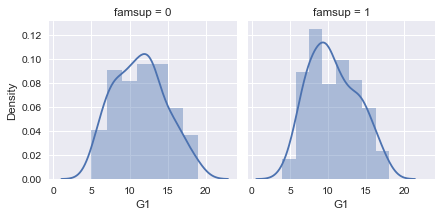

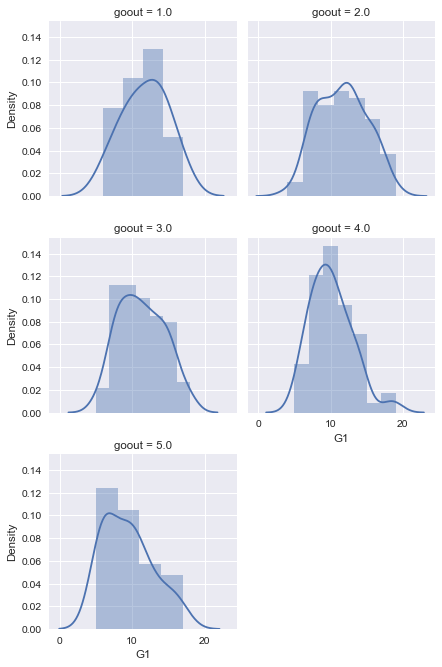

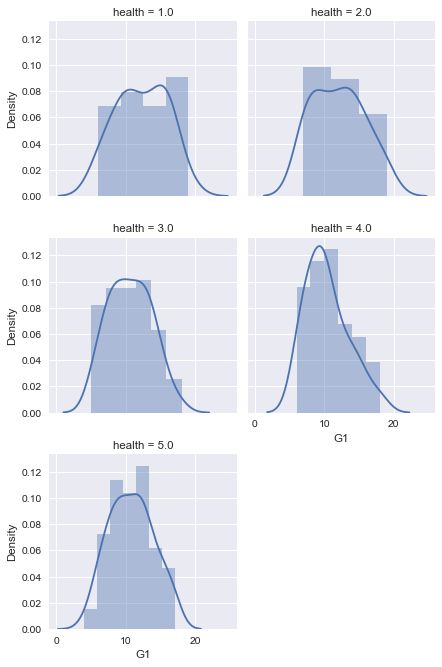

In [173]:
for i in clear_var_sig:
    for j in ['G1']:
        if i != 'G1':
            gr.graficar(df,j,i)

#### Modelo 1 G2

OLS para G2

In [174]:
# Creación del modelo
model_g2_1 = smf.ols(base_g2_1, data=df_dummies_g2).fit()
model_g2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     2.693
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           2.14e-06
Time:                        17:45:23   Log-Likelihood:                -729.98
No. Observations:                 284   AIC:                             1540.
Df Residuals:                     244   BIC:                             1686.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.5100      4.269      2.930      0.004       4.101      20.919
school                0.2397      0.785      0.305      0.760      -1.306       1.785
sex                   0.8885      0.508      1.748      0.082      -0.112       1.889
age                  -0.0696      0.218     -0.320      0.749      -0.498       0.359
address              -0.7540      0.573     -1.315      0.190      -1.883       0.375
famsize               0.4639      0.518      0.895      0.372      -0.557       1.485
Pstatus               0.5952      0.766      0.777      0.438      -0.913       2.103
Medu                  0.3221      0.332      0.971      0.332      -0.331       0.975
Fedu                 -0.1232      0.278     -0.443      0.658      -0.671       0.425
traveltime           -0.2211      0.342     -0.646      0.519      -0.896       0.453
studytime             0.4171      0.289      1.444      0.150      -0.152       0.986
failures             -1.1293      0.333     -3.396      0.001      -1.784      -0.474
schoolsup            -1.0396      0.664     -1.566      0.119      -2.347       0.268
famsup               -1.0023      0.484     -2.071      0.039      -1.956      -0.049
paid                  0.4781      0.474      1.008      0.315      -0.457       1.413
activities           -0.2109      0.436     -0.484      0.629      -1.069       0.647
nursery               0.1439      0.536      0.269      0.789      -0.911       1.199
higher                1.1094      1.031      1.076      0.283      -0.921       3.140
internet              0.4415      0.590      0.748      0.455      -0.722       1.605
romantic             -0.7324      0.470     -1.559      0.120      -1.658       0.193
famrel                0.0282      0.251      0.112      0.911      -0.466       0.522
freetime              0.3319      0.227      1.462      0.145      -0.115       0.779
goout                -0.9655      0.234     -4.130      0.000      -1.426      -0.505
Dalc                 -0.2099      0.337     -0.624      0.533      -0.873       0.453
Walc                  0.3593      0.247      1.455      0.147      -0.127       0.846
health               -0.3901      0.167     -2.342      0.020      -0.718      -0.062
absences             -0.0079      0.029     -0.274      0.785      -0.064       0.049
Mjob_health           1.3034      1.081      1.205      0.229      -0.827       3.433
Mjob_other           -0.0448      0.704     -0.064      0.949      -1.432       1.342
Mjob_services         0.5276      0.795      0.663      0.508      -1.039       2.094
Mjob_teacher         -0.9595      0.984     -0.975      0.330      -2.898       0.979
Fjob_health          -0.3798      1.536     -0.247      0.805      -3.405       2.645
Fjob_other           -0.6572      1.159     -0.567      0.571      -2.940

Al igual que con G1, gracias al 95% de confianza ("p" del estadístico F < 0.05) nuestro modelo es significativo. Con las variables incorporadas explicamos un 30% a G2. 

Eliminaremos variables que no son significativas, es decir, aquellas que contienen el cero en su intervalo de confianza.

#### Modelo 2 (G2)

In [175]:
# Creacion de DF con valores significativos
clear_var_sig2 = ['failures', 'famsup', 'goout', 'health', 'G2']
df_mod_g2 = df_dummies_g2.loc[:, clear_var_sig2]
df_mod_g2

,failures,famsup,goout,health,G2
0,0.0,1,3.0,3.0,5.0
1,0.0,1,2.0,5.0,14.0
2,0.0,1,2.0,5.0,15.0
3,0.0,0,4.0,3.0,12.0
4,0.0,1,4.0,1.0,5.0
...,...,...,...,...,...
279,2.0,1,4.0,4.0,9.0
280,0.0,0,5.0,2.0,16.0
281,3.0,0,3.0,3.0,8.0
282,0.0,0,1.0,5.0,12.0


In [176]:
# Creación del modelo
base_formula_g2_2 = fun.mf(df_mod_g2, var_obj='G2')
model_g2_2 = smf.ols(base_formula_g2_2, data=df_mod_g2).fit()
model_g2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     13.34
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           5.80e-10
Time:                        17:45:23   Log-Likelihood:                -755.95
No. Observations:                 284   AIC:                             1522.
Df Residuals:                     279   BIC:                             1540.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8484      0.885     16.770      0.000      13.105      16.591
failures      -1.4703      0.290     -5.075      0.000      -2.041      -0.900
famsup        -0.6903      0.427     -1.618      0.107      -1.530       0.149
goout         -0.6521      0.196     -3.330      0.001      -1.038      -0.267
health        -0.3533      0.158     -2.231      0.026      -0.665      -0.042
==============================================================================
Omnibus:                       13.249   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.707
Skew:                          -0.446   Prob(JB):                     0.000640
Kurtosis:                       3.669   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- El nuevo modelo mantiene un 95% de confianza, pero disminuye la explicacion de los atributos sobre la variable explicada (16,1%).
- Lo indicado es esperable ya que se eliminaron las variables que no demostraron significancia en el primer modelo. (Que pasan por cero)

Graficos variables significativas:

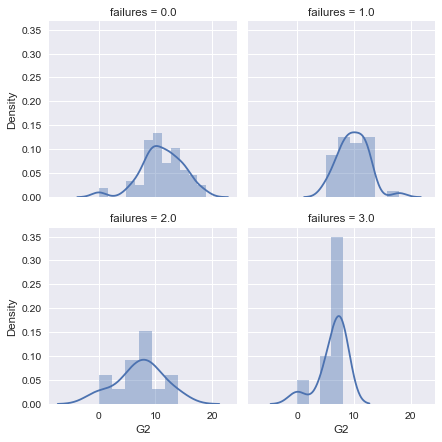

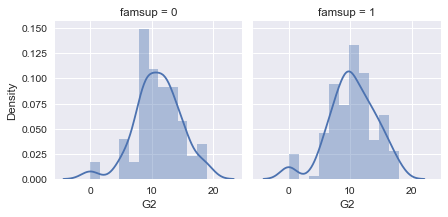

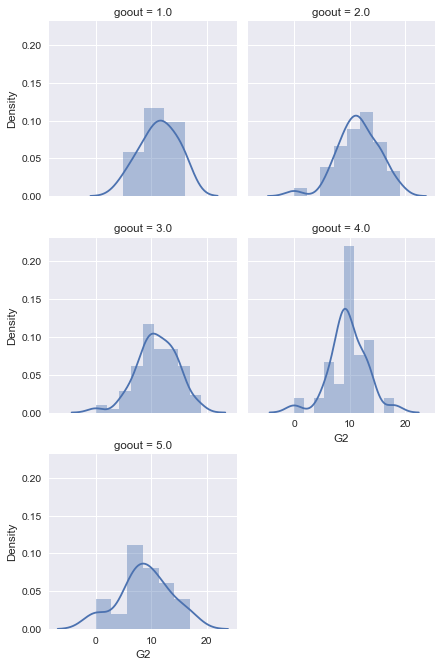

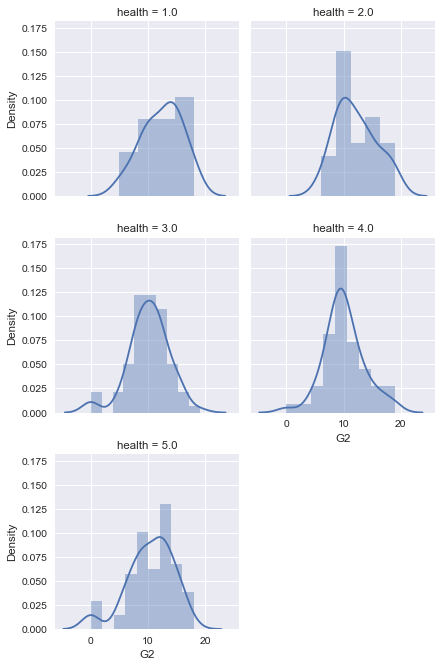

In [177]:
for i in clear_var_sig2:
    for j in ['G2']:
        if i != 'G2':
            gr.graficar(df,j,i)

#### Modelo 1 (G3)

OLS para G3

In [178]:
# Creación del modelo
model_g3_1 = smf.ols(base_g3_1, data=df_dummies_g3).fit()
model_g3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     2.831
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           6.14e-07
Time:                        17:45:26   Log-Likelihood:                -780.76
No. Observations:                 284   AIC:                             1642.
Df Residuals:                     244   BIC:                             1787.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.7113      5.105      2.294      0.023       1.655      21.767
school                0.9206      0.938      0.981      0.327      -0.927       2.769
sex                   1.0108      0.608      1.663      0.098      -0.186       2.208
age                  -0.1608      0.260     -0.618      0.537      -0.673       0.352
address              -0.8873      0.686     -1.294      0.197      -2.238       0.463
famsize               0.3597      0.620      0.580      0.562      -0.861       1.580
Pstatus               1.0103      0.916      1.103      0.271      -0.793       2.814
Medu                  0.5017      0.397      1.265      0.207      -0.279       1.283
Fedu                 -0.3060      0.333     -0.920      0.358      -0.961       0.349
traveltime           -0.1333      0.409     -0.326      0.745      -0.940       0.673
studytime             0.3779      0.345      1.094      0.275      -0.302       1.058
failures             -1.4767      0.398     -3.713      0.000      -2.260      -0.693
schoolsup            -1.0615      0.794     -1.337      0.182      -2.625       0.502
famsup               -0.9381      0.579     -1.621      0.106      -2.078       0.202
paid                  0.5265      0.567      0.928      0.354      -0.591       1.644
activities           -0.6244      0.521     -1.199      0.232      -1.650       0.402
nursery               0.0846      0.641      0.132      0.895      -1.177       1.347
higher                1.7295      1.233      1.403      0.162      -0.699       4.158
internet              0.4170      0.706      0.591      0.555      -0.974       1.808
romantic             -0.8878      0.562     -1.581      0.115      -1.994       0.219
famrel                0.4857      0.300      1.621      0.106      -0.105       1.076
freetime              0.4721      0.271      1.739      0.083      -0.063       1.007
goout                -1.2396      0.280     -4.434      0.000      -1.790      -0.689
Dalc                 -0.5493      0.402     -1.365      0.174      -1.342       0.243
Walc                  0.7566      0.295      2.562      0.011       0.175       1.338
health               -0.3936      0.199     -1.976      0.049      -0.786      -0.001
absences              0.0336      0.034      0.977      0.329      -0.034       0.101
Mjob_health           1.3603      1.293      1.052      0.294      -1.187       3.907
Mjob_other            0.2651      0.842      0.315      0.753      -1.393       1.924
Mjob_services         0.7422      0.951      0.780      0.436      -1.131       2.616
Mjob_teacher         -1.0447      1.177     -0.888      0.376      -3.362       1.273
Fjob_health          -0.6401      1.836     -0.349      0.728      -4.257       2.977
Fjob_other           -1.4023      1.386     -1.012      0.313      -4.132

Gracias al 95% de confianza ("p" del estadístico F < 0.05) nuestro modelo es significativo. Con las variables incorporadas explicamos un 31,2% a G3. 

Eliminaremos variables que no son significativas, es decir, aquellas que contienen el cero en su intervalo de confianza.

#### Modelo 2 (G3)

In [179]:
# Creacion de DF con valores significativos
clear_var_sig3 = ['failures', 'goout', 'Walc', 'health', 'G3']
df_mod_g3 = df_dummies_g3.loc[:, clear_var_sig3]
df_mod_g3

,failures,goout,Walc,health,G3
0,0.0,3.0,1.0,3.0,6.0
1,0.0,2.0,1.0,5.0,15.0
2,0.0,2.0,2.0,5.0,15.0
3,0.0,4.0,1.0,3.0,11.0
4,0.0,4.0,1.0,1.0,6.0
...,...,...,...,...,...
279,2.0,4.0,5.0,4.0,9.0
280,0.0,5.0,4.0,2.0,16.0
281,3.0,3.0,3.0,3.0,7.0
282,0.0,1.0,4.0,5.0,10.0


In [180]:
# Creación del modelo
base_formula_g3_2 = fun.mf(df_mod_g3, var_obj='G3')
model_g3_2 = smf.ols(base_formula_g3_2, data=df_mod_g3).fit()
model_g3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     14.09
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           1.74e-10
Time:                        17:45:26   Log-Likelihood:                -807.64
No. Observations:                 284   AIC:                             1625.
Df Residuals:                     279   BIC:                             1644.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2740      1.023     13.953      0.000      12.260      16.288
failures      -1.9922      0.348     -5.717      0.000      -2.678      -1.306
goout         -0.9641      0.262     -3.683      0.000      -1.479      -0.449
Walc           0.4610      0.220      2.097      0.037       0.028       0.894
health        -0.3507      0.191     -1.836      0.067      -0.727       0.025
==============================================================================
Omnibus:                       18.452   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.182
Skew:                          -0.609   Prob(JB):                     4.15e-05
Kurtosis:                       3.473   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- El nuevo modelo mantiene un 95% de confianza, pero disminuye la explicacion de los atributos sobre la variable explicada (16,8).
- Lo indicado es esperable ya que se eliminaron las variables que no demostraron significancia en el primer modelo. (Que pasan por cero)

Graficos variables significativas:

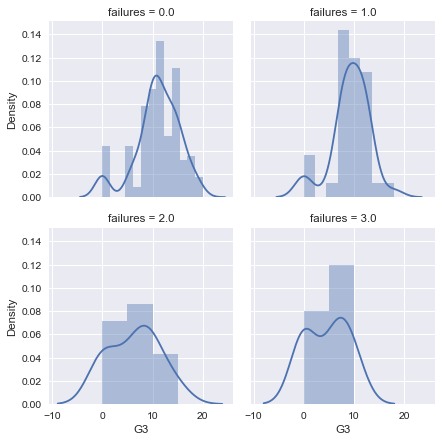

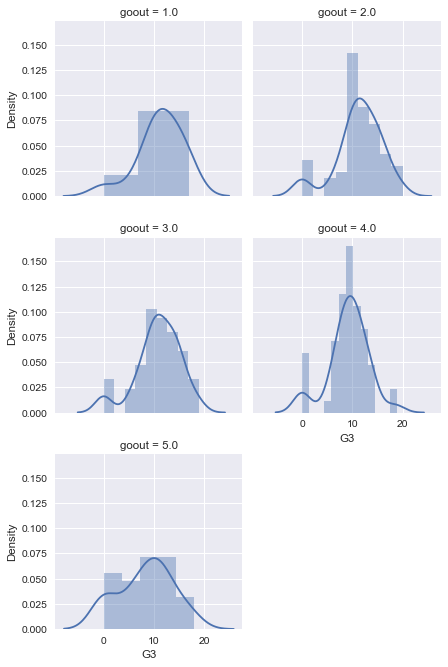

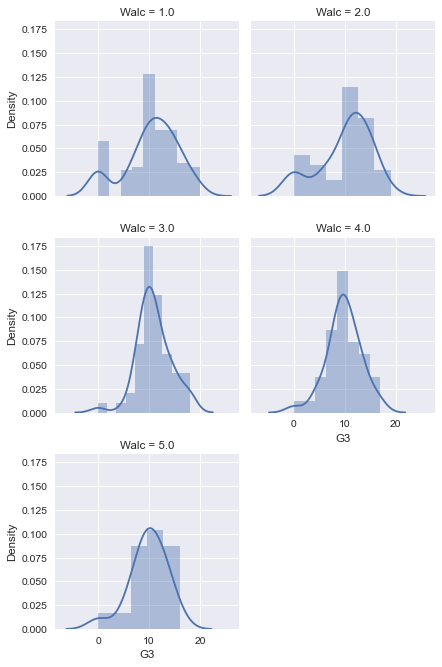

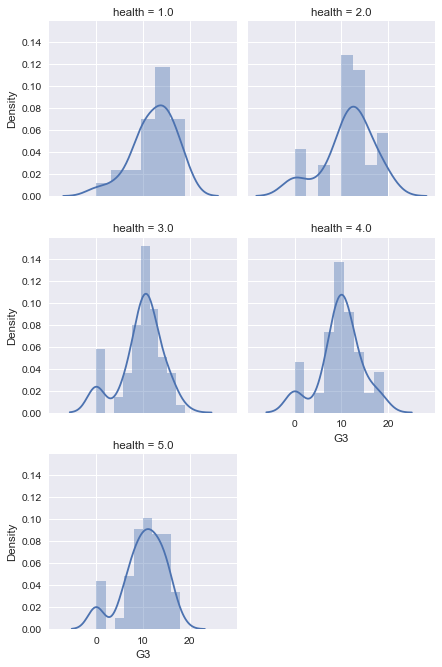

In [181]:
for i in clear_var_sig3:
    for j in ['G3']:
        if i != 'G3':
            gr.graficar(df,j,i)

#### Definición de las estrategias de Modelación predictiva (Hito 4):

- Si bien realizamos un modelo descriptivo para G3, para el <code>análisis predictivo usaremos la union de las variables significativas de G1 y G2</code> ya que G3 representa el promedio de ambas variables.

- Se dividiran los datos resultantes en subconjuntos de entrenamiento y testeo, usando <code>train_test_split de Scikit-Learn</code>.

- Luego de divididos los conjuntos de datos analizaremos si se debe <code>estandarizar con StandardScaler</code> en caso que existan variables numéricas con valores muy altos.

- Con una <code>regresión lineal</code> para el ajuste. Ajustaremos el modelo, realizaremos predicciones y verificaremos la significancia de nuestro modelo (con los coeficientes y estadísticos)